In [7]:
import numpy as np
from ecog_band.datasetAllband import SVMDataset
from ecog_band.models import SVMBinClassifier, DecisionTreeBinClassifier, RandomForestBinClassifier, KNeighborsBinClassifier, GaussianNBBinClassifier
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import os
from sklearn.model_selection import GridSearchCV,train_test_split
from ecog_band.utils import *
from ecog_band.solver import Nfold_solver
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# PCA

In [2]:
HS = 69
freq = 500
elec = 7
path_elec = f'/public/DATA/overt_reading/dataset_/HS{HS}/{freq}/{elec}'
band_list = get_all_band()
num_samples = len(os.listdir(path_elec))

In [8]:
data_loader = SVMDataset(HS, path_elec, freq, elec, num_samples)
data, labels = data_loader.get_data_labels()
print(f'data_shape: {data.shape}')


data_shape: (720, 375)


data_shape: (720, 375)
Explained variance ratio of each component:
[0.73082762 0.1008582  0.08804614 0.01827918 0.0072416  0.00628212]
Number of components selected: 6


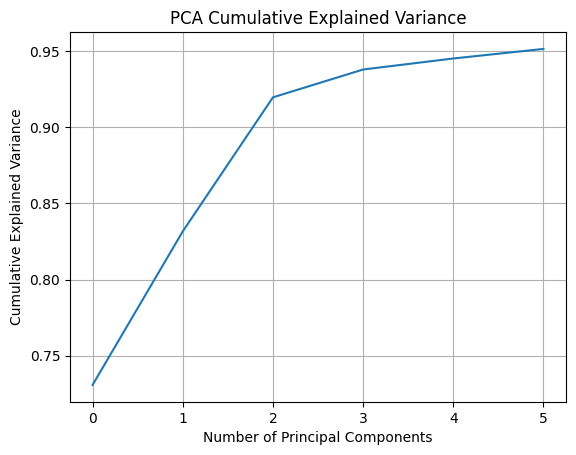

Principal component loadings (coefficients):
[[-1.23628600e-04 -8.87908629e-05 -1.76127637e-04 ...  1.86753834e-04
   1.44930543e-04  1.27452356e-04]
 [-5.42795071e-03 -5.14938885e-03 -4.90795501e-03 ... -2.70873919e-03
  -3.13557418e-03 -3.61869807e-03]
 [ 8.59593271e-04  1.96160460e-03  6.97453542e-03 ... -1.06500602e-03
  -1.29255780e-03 -1.47371327e-03]
 [ 3.22886015e-02  3.24761373e-02  3.05014239e-02 ...  2.78373657e-02
   2.73004777e-02  2.73077598e-02]
 [-3.57069722e-02 -3.91970989e-02 -4.00684930e-02 ...  1.37869440e-02
   1.21805736e-02  1.17607374e-02]
 [ 3.95294117e-02  4.15121006e-02  4.60529368e-02 ... -3.52837078e-02
  -3.32022233e-02 -3.23506180e-02]]


In [6]:

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(data)

# 打印每个主成分解释的方差比例
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio of each component:")
print(explained_variance_ratio)

# 打印主成分数量
print("Number of components selected:", pca.n_components_)

# 绘制主成分解释的累计方差比例
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.grid(True)
plt.show()

print("Principal component loadings (coefficients):")
print(pca.components_)

# Correlation Analysis

Correlation matrix:
[[ 1.00000000e+00  7.08127783e-01  7.59497101e-01 ...  7.00767652e-03
   8.34617133e-04  4.03829539e-02]
 [ 7.08127783e-01  1.00000000e+00  7.11977467e-01 ...  3.33386445e-02
   1.94978801e-02  4.82691538e-02]
 [ 7.59497101e-01  7.11977467e-01  1.00000000e+00 ... -7.43389116e-03
   4.59675152e-04  4.04103531e-02]
 ...
 [ 7.00767652e-03  3.33386445e-02 -7.43389116e-03 ...  1.00000000e+00
   7.38106658e-01  8.38758353e-01]
 [ 8.34617133e-04  1.94978801e-02  4.59675152e-04 ...  7.38106658e-01
   1.00000000e+00  7.36421394e-01]
 [ 4.03829539e-02  4.82691538e-02  4.04103531e-02 ...  8.38758353e-01
   7.36421394e-01  1.00000000e+00]]


AttributeError: AxesImage.set() got an unexpected keyword argument 'annot'

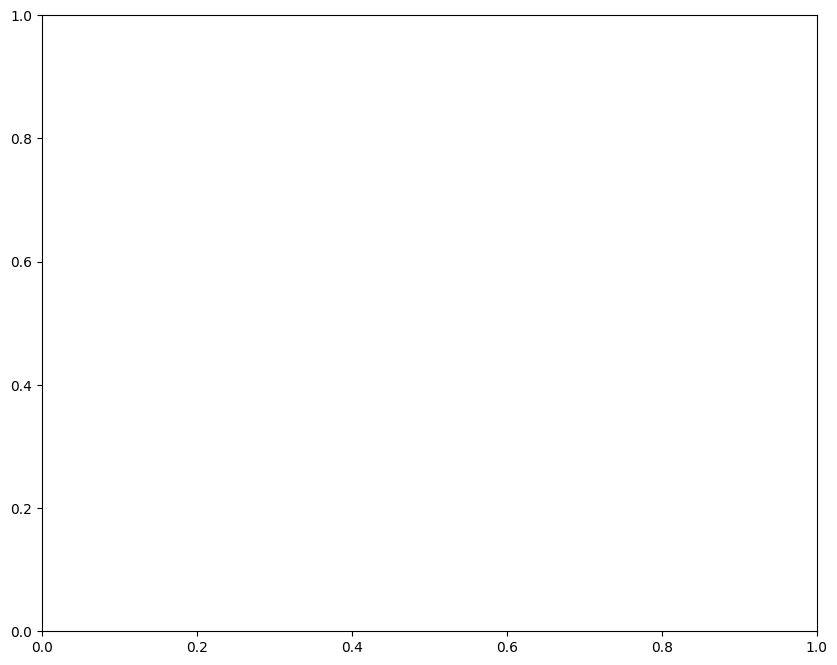

In [12]:
correlation_matrix = np.corrcoef(data, rowvar=False)
# 打印相关矩阵
print("Correlation matrix:")
print(correlation_matrix)

# 可视化相关矩阵
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix of Frequency Bands')
plt.xlabel('Frequency Bands')
plt.ylabel('Frequency Bands')
plt.show()